In [1]:
import pandas as pd

In [46]:
data = pd.read_csv('../data/users/data_user_046.csv')

In [11]:
data

,time,lat,lon,user
0,2009-10-04 01:51:25,39.175415,117.150240,46
1,2009-10-04 01:51:30,39.175229,117.150620,46
2,2009-10-04 01:51:35,39.175153,117.150866,46
3,2009-10-04 01:51:40,39.175149,117.150966,46
4,2009-10-04 01:51:45,39.175126,117.150976,46
...,...,...,...,...
21813,2010-06-02 11:25:34,40.032620,116.328113,46
21814,2010-06-02 11:25:39,40.032616,116.328072,46
21815,2010-06-02 11:25:44,40.032615,116.328060,46
21816,2010-06-02 11:25:49,40.032616,116.328053,46


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
user = 46

In [34]:
import warnings

In [35]:
warnings.filterwarnings('ignore')

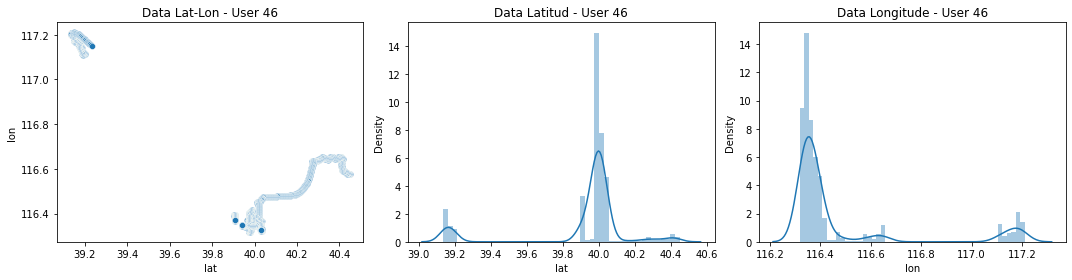

In [56]:
fig = plt.figure(figsize=(15, 4))

fig.add_subplot(1, 3, 1)
sns.scatterplot(data['lat'],data['lon'])
plt.title(f'Data Lat-Lon - User {user}')

fig.add_subplot(1, 3, 2)
sns.distplot(data['lat'])
plt.title(f'Data Latitud - User {user}')

fig.add_subplot(1, 3, 3)
sns.distplot(data['lon'])
plt.title(f'Data Longitude - User {user}')

plt.tight_layout();

fig.savefig('img.png')

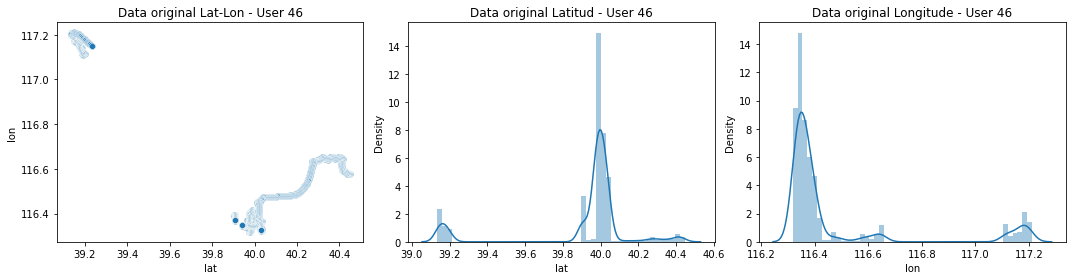

In [49]:
plot_user_geodata(data2, user)

In [63]:
import os

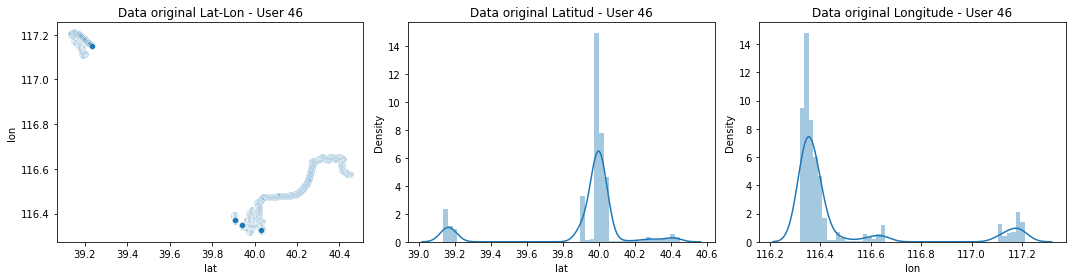

In [64]:
plot_user_geodata(data, user, img_path='../')

In [61]:
def plot_user_geodata(data, user, title='original', figsize=(15, 4), img_path='./'):
    fig = plt.figure(figsize=figsize)

    fig.add_subplot(1, 3, 1)
    sns.scatterplot(data['lat'],data['lon'])
    plt.title(f'Data {title} Lat-Lon - User {user}')

    fig.add_subplot(1, 3, 2)
    sns.distplot(data['lat'])
    plt.title(f'Data {title} Latitud - User {user}')

    fig.add_subplot(1, 3, 3)
    sns.distplot(data['lon'])
    plt.title(f'Data {title} Longitude - User {user}')

    plt.tight_layout();

    fig.savefig(os.path.join(img_path, f'{title}_{user}.png'))

In [23]:
data2 = data.append(data).append(data).append(data).append(data).append(data)

In [9]:
import folium
mapit = None
latlon = [ (51.249443914705175, -0.13878830247011467), (51.249443914705175, -0.13878830247011467), (51.249768239976866, -2.8610415615063034)]
for coord in latlon:
    mapit = folium.Map( location=[ coord[0], coord[1] ] )

#mapit.save( 'map.html')

In [10]:
mapit

In [7]:
!ls -lah

total 27864
drwxr-xr-x  15 gabpila  staff   480B Feb 15 16:11 .
drwxr-xr-x  18 gabpila  staff   576B Feb 15 08:07 ..
drwxr-xr-x  10 gabpila  staff   320B Feb 15 16:11 .ipynb_checkpoints
-rw-r--r--   1 gabpila  staff   8.7K Jan  6 01:07 00.5_GeoLife_Extraction.ipynb
-rw-r--r--   1 gabpila  staff   3.6M Jan 15 17:56 00.6_GeoLife_EDA.ipynb
-rw-r--r--   1 gabpila  staff   8.4M Jan  6 01:07 00_SkMobility_Learning.ipynb
-rw-r--r--   1 gabpila  staff   121K Jan 15 17:56 01_MMC_implementation_w_skmob.ipynb
-rw-r--r--   1 gabpila  staff    46K Jan 29 18:23 02_MMC_multiple_tdfs.ipynb
-rw-r--r--   1 gabpila  staff    61K Jan 15 00:39 geo_clusters
-rw-r--r--   1 gabpila  staff     0B Jan 15 00:39 geo_clusters_img
-rw-r--r--   1 gabpila  staff   115K Jan 15 00:39 geo_clusters_transit
-rw-r--r--   1 gabpila  staff   1.1M Jan 15 00:39 geo_clusters_transit_df
-rw-r--r--   1 gabpila  staff    53K Jan 15 17:56 img.jpg
-rw-r--r--   1 gabpila  staff   3.0K Feb 15 16:11 map.html
-rw-r--r--   1 gabpila  sta

In [4]:
import io
from PIL import Image

img_data = m._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save('image.png')

NameError: name 'm' is not defined

In [3]:
data

,time,lat,lon,user
0,2009-10-04 01:51:25,39.175415,117.150240,46
1,2009-10-04 01:51:30,39.175229,117.150620,46
2,2009-10-04 01:51:35,39.175153,117.150866,46
3,2009-10-04 01:51:40,39.175149,117.150966,46
4,2009-10-04 01:51:45,39.175126,117.150976,46
...,...,...,...,...
21813,2010-06-02 11:25:34,40.032620,116.328113,46
21814,2010-06-02 11:25:39,40.032616,116.328072,46
21815,2010-06-02 11:25:44,40.032615,116.328060,46
21816,2010-06-02 11:25:49,40.032616,116.328053,46
